# **Recreating different kinds of curves with linear regression**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## This is a hands on study about how Linear Regression can be used to generate diferent kinds of curves, allowing a simple and fast solution thac can be used to model different kinds of real wolrd problem with good accuracy.

In [2]:
train_data = np.arange(1,100).reshape(-1, 1)

## Starting with a simple linear data

Text(0.5, 1.0, 'Original data')

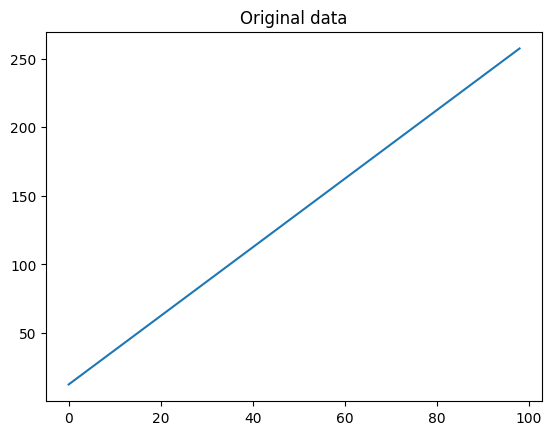

In [3]:
data_linear = np.arange(1,100) * 2.5 + 10
plt.plot(data_linear)
plt.title("Original data")

Text(0.5, 1.0, 'Learned line')

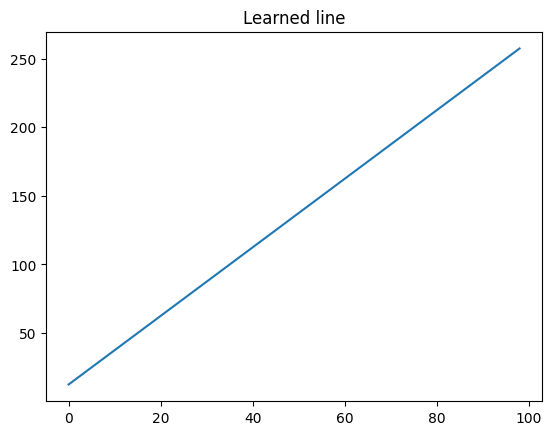

In [4]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(train_data,data_linear)
plt.plot(linear_model.predict(train_data))
plt.title("Learned line")

## 2º Degree polynomium

Text(0.5, 1.0, 'Original data')

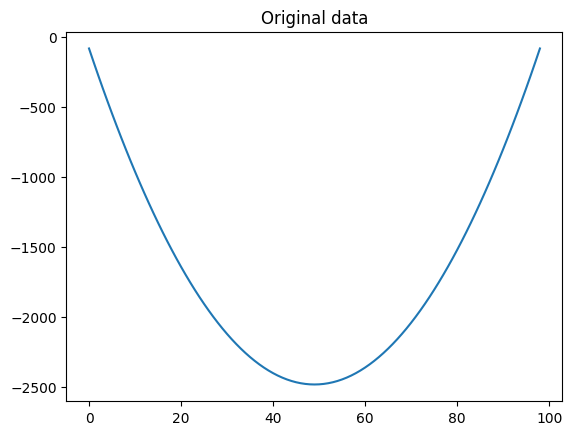

In [5]:
x = np.arange(1,100)
data_2_degree = x ** 2  - x* 100 + 15
plt.plot(data_2_degree)
plt.title("Original data")

In [6]:
train_data_2_dgr = pd.DataFrame({"A":np.arange(1,100) , "B":np.arange(1,100)})
train_data_2_dgr.head()

,A,B
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


Text(0.5, 1.0, 'Learned curve')

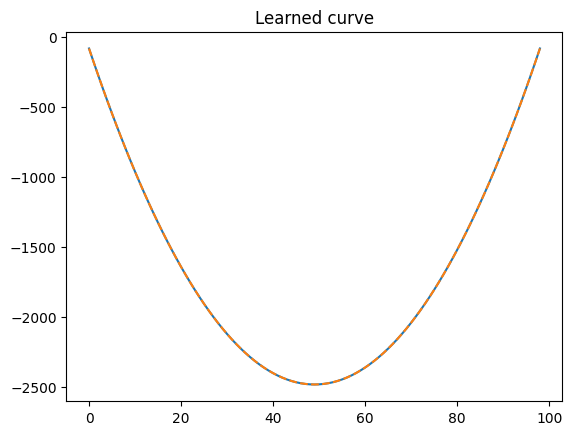

In [7]:
train_data_2_dgr["A"] = train_data_2_dgr["A"] ** 2
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(train_data_2_dgr,data_2_degree)
plt.plot(linear_model.predict(train_data_2_dgr))
plt.plot(data_2_degree,linestyle = "--")
plt.title("Learned curve")

## Sin Cos product curves

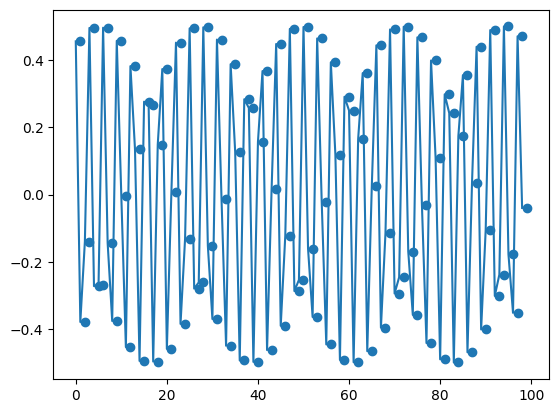

In [8]:
sin_data = ( np.sin(train_data)) * (np.cos(train_data))
# plt.plot(np.sin(train_data),linestyle = "--")
# plt.plot(np.cos(train_data),linestyle = "--")

plt.plot(sin_data)
plt.scatter(train_data ,sin_data)

In [9]:
det_proc = DeterministicProcess( np.arange(1,100), constant=True, period=(np.pi * 2) , fourier=2)

train_sin_cos_data = det_proc.in_sample()
train_sin_cos_data

,const,"sin(1,6.28)","cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"
1,1.0,0.000000,1.000000,0.000000,1.000000
2,1.0,0.841471,0.540302,0.909297,-0.416147
3,1.0,0.909297,-0.416147,-0.756802,-0.653644
4,1.0,0.141120,-0.989992,-0.279415,0.960170
5,1.0,-0.756802,-0.653644,0.989358,-0.145500
...,...,...,...,...,...
95,1.0,-0.245252,0.969459,-0.475524,0.879703
96,1.0,0.683262,0.730174,0.997799,0.066307
97,1.0,0.983588,-0.180430,-0.354938,-0.934890
98,1.0,0.379608,-0.925148,-0.702386,0.711796


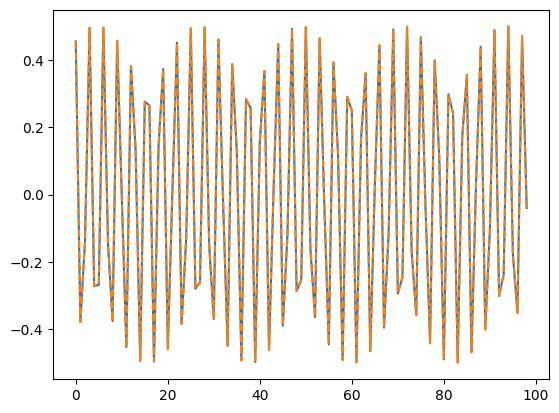

In [10]:
sin_cos_model = LinearRegression(fit_intercept=False)
sin_cos_model.fit(train_sin_cos_data,sin_data)
plt.plot(sin_cos_model.predict(train_sin_cos_data))
plt.plot(sin_data,linestyle = "--")

In [11]:
intercept = sin_cos_model.intercept_
coefficients = sin_cos_model.coef_

equation = f'y = '
for i, coef in enumerate(coefficients[0]):
    equation += f' ({coef} * {train_sin_cos_data.columns[i]}) +'

    
print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
y =  (-5.362439946641761e-18 * const) + (1.0547118733938987e-15 * sin(1,6.28)) + (-8.673617379884035e-17 * cos(1,6.28)) + (-0.20807341827357195 * sin(2,6.28)) + (0.45464871341283963 * cos(2,6.28)) +


## log curve

### Simple log curve

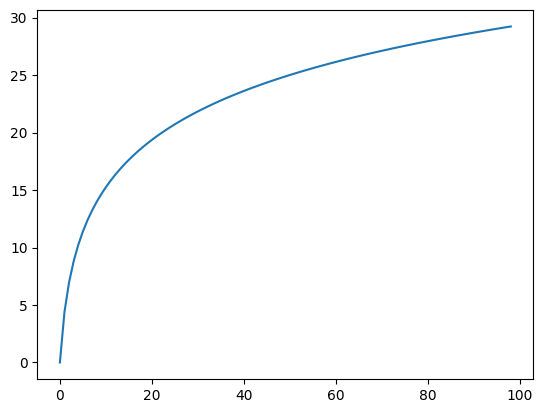

In [12]:
log_data = 3.86 * np.log(train_data) + 2.5 *(np.log(train_data)) 
plt.plot(log_data)

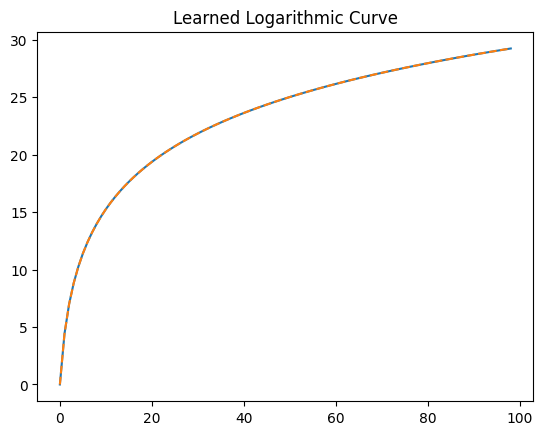

In [13]:
plt.title("Original Logarithmic Data")
# Transform data for linear regression
log_train_data = np.log(train_data)
log_model = LinearRegression(fit_intercept=True)
linear_model.fit(log_train_data, log_data)
log_predictions = linear_model.predict(log_train_data)

plt.plot(log_predictions)
plt.plot(log_data, linestyle="--")
plt.title("Learned Logarithmic Curve")
plt.show()

## Product of logs

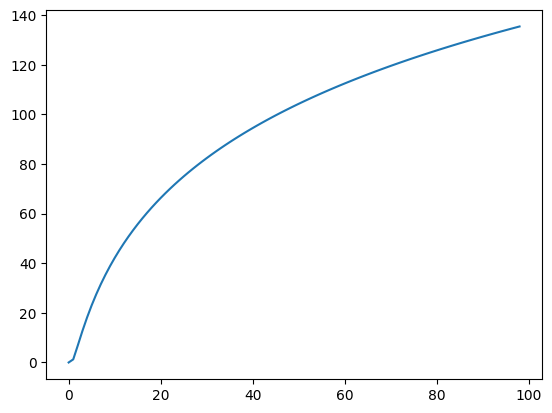

In [14]:
log_prod_data = 3.86 *  np.log(train_data ** 2) * 2.5 * (np.log(np.log(train_data + 1))) 
plt.plot(log_prod_data)

#### **First approach**

Text(0.5, 1.0, 'learned curve')

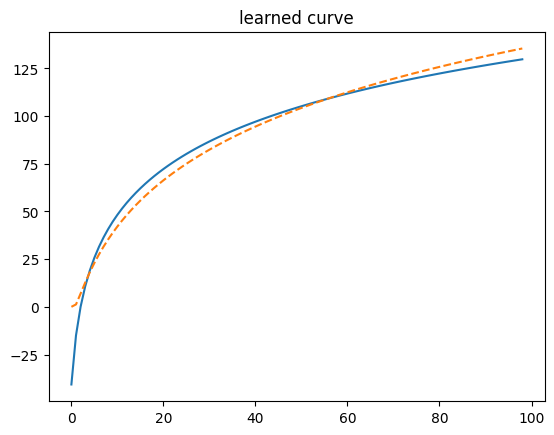

In [15]:
log_prod_train_data = np.log(train_data) 
log_model = LinearRegression(fit_intercept=True)
log_model.fit(log_prod_train_data, log_prod_data)
log_prod_predictions = log_model.predict(log_prod_train_data)

plt.plot(log_prod_predictions)
plt.plot(log_prod_data, linestyle="--")
plt.title("learned curve")

#### **Including log**

In [16]:
dplog = DeterministicProcess( np.arange(1,100), constant=True,order=2)
log_prod_train_data2 = dplog.in_sample()
log_prod_train_data2["log"] =log_prod_train_data
log_prod_train_data2.head()

,const,trend,trend_squared,log
1,1.0,1.0,1.0,0.000000
2,1.0,2.0,4.0,0.693147
3,1.0,3.0,9.0,1.098612
4,1.0,4.0,16.0,1.386294
5,1.0,5.0,25.0,1.609438


Text(0.5, 1.0, 'learned curve')

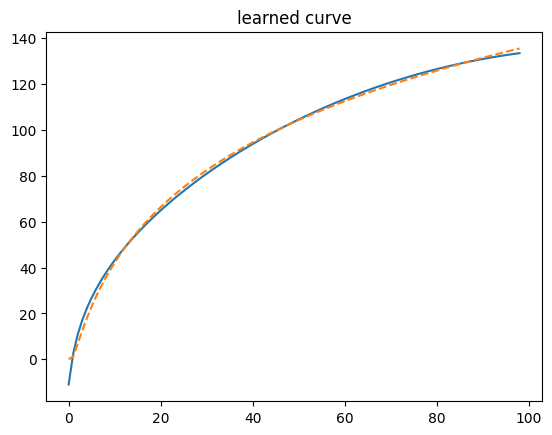

In [17]:

log_model2 = LinearRegression(fit_intercept=False)
log_model2.fit(log_prod_train_data2, log_prod_data)
log_prod_predictions2 = log_model2.predict(log_prod_train_data2)

plt.plot(log_prod_predictions2)
plt.plot(log_prod_data, linestyle="--")
plt.title("learned curve")

### Including log and 3 degree polynomium

In [18]:
dplog = DeterministicProcess( np.arange(1,100), constant=True,order=3)
log_prod_train_data2 = dplog.in_sample()
log_prod_train_data2["log"] =log_prod_train_data
log_prod_train_data2.head()

,const,trend,trend_squared,trend_cubed,log
1,1.0,1.0,1.0,1.0,0.000000
2,1.0,2.0,4.0,8.0,0.693147
3,1.0,3.0,9.0,27.0,1.098612
4,1.0,4.0,16.0,64.0,1.386294
5,1.0,5.0,25.0,125.0,1.609438


Text(0.5, 1.0, 'learned curve')

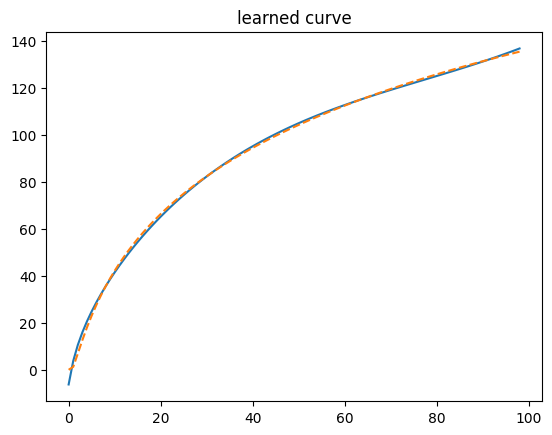

In [19]:
log_model2 = LinearRegression(fit_intercept=False)
log_model2.fit(log_prod_train_data2, log_prod_data)
log_prod_predictions2 = log_model2.predict(log_prod_train_data2)

plt.plot(log_prod_predictions2)
plt.plot(log_prod_data, linestyle="--")
plt.title("learned curve")

## plynomium only aproximation , 5 degree

In [20]:
dplog = DeterministicProcess( np.arange(1,100), constant=True, period=(np.pi * 2) ,order = 5)
log_prod_train_data2 = dplog.in_sample()
# log_prod_train_data2["log"] =log_prod_train_data
log_prod_train_data2.head()

,const,trend,trend_squared,trend_cubed,trend**4,trend**5
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,2.0,4.0,8.0,16.0,32.0
3,1.0,3.0,9.0,27.0,81.0,243.0
4,1.0,4.0,16.0,64.0,256.0,1024.0
5,1.0,5.0,25.0,125.0,625.0,3125.0


Text(0.5, 1.0, 'learned curve')

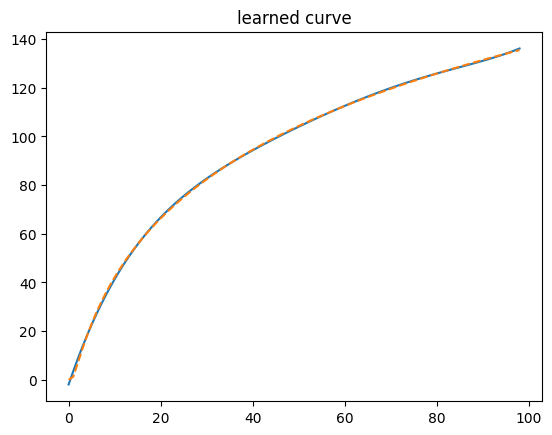

In [21]:
log_model2 = LinearRegression(fit_intercept=False)
log_model2.fit(log_prod_train_data2, log_prod_data)
log_prod_predictions2 = log_model2.predict(log_prod_train_data2)

plt.plot(log_prod_predictions2)
plt.plot(log_prod_data, linestyle="--")
plt.title("learned curve")

In [22]:
intercept = log_model2.intercept_
coefficients = log_model2.coef_

equation = f'y = '
for i, coef in enumerate(coefficients[0]):
    equation += f' ({coef} * {log_prod_train_data2.columns[i]}) +'

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
y =  (-7.675674904426817 * const) + (5.9118147161690535 * trend) + (-0.15834558553360809 * trend_squared) + (0.0025888429034758875 * trend_cubed) + (-2.1518721525407014e-05 * trend**4) + (6.998804824576155e-08 * trend**5) +


# Combine simple trend movement with cycles

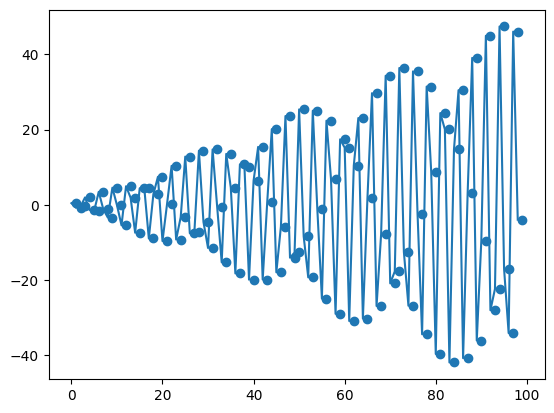

In [23]:
sin_cos_data_move = ( train_data  * np.sin(train_data) * (np.cos(train_data)))
# plt.plot(np.sin(train_data),linestyle = "--")
# plt.plot(np.cos(train_data),linestyle = "--")

plt.plot(sin_cos_data_move)
plt.scatter(train_data ,sin_cos_data_move)

In [24]:
det_proc = DeterministicProcess( np.arange(1,100), constant=True, period=(np.pi * 2) , fourier=2,order = 3)

train_sin_cos_data = det_proc.in_sample()
train_sin_cos_data

,const,trend,trend_squared,trend_cubed,"sin(1,6.28)","cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"
1,1.0,1.0,1.0,1.0,0.000000,1.000000,0.000000,1.000000
2,1.0,2.0,4.0,8.0,0.841471,0.540302,0.909297,-0.416147
3,1.0,3.0,9.0,27.0,0.909297,-0.416147,-0.756802,-0.653644
4,1.0,4.0,16.0,64.0,0.141120,-0.989992,-0.279415,0.960170
5,1.0,5.0,25.0,125.0,-0.756802,-0.653644,0.989358,-0.145500
...,...,...,...,...,...,...,...,...
95,1.0,95.0,9025.0,857375.0,-0.245252,0.969459,-0.475524,0.879703
96,1.0,96.0,9216.0,884736.0,0.683262,0.730174,0.997799,0.066307
97,1.0,97.0,9409.0,912673.0,0.983588,-0.180430,-0.354938,-0.934890
98,1.0,98.0,9604.0,941192.0,0.379608,-0.925148,-0.702386,0.711796


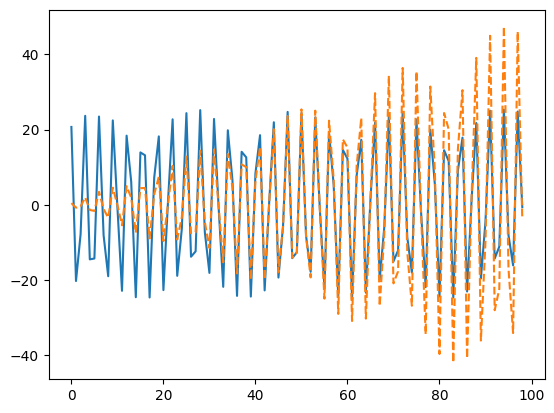

In [25]:
sin_cos_move_model = LinearRegression(fit_intercept=False)
sin_cos_move_model.fit(train_sin_cos_data,sin_cos_data_move)
plt.plot(sin_cos_move_model.predict(train_sin_cos_data))
plt.plot(sin_cos_data_move,linestyle = "--")

In [26]:
intercept = sin_cos_move_model.intercept_
coefficients = sin_cos_move_model.coef_

equation = f'y = '
for i, coef in enumerate(coefficients[0]):
    equation += f' ({coef} * {train_sin_cos_data.columns[i]}) +'

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
y =  (-1.62687317901865 * const) + (0.14099754728115466 * trend) + (-0.003210457167988733 * trend_squared) + (2.1063391378750573e-05 * trend_cubed) + (0.10917697110728022 * sin(1,6.28)) + (-0.27385257067337315 * cos(1,6.28)) + (-10.422696098031803 * sin(2,6.28)) + (22.464762206869125 * cos(2,6.28)) +


### **Changing approach**

In [27]:
train_sin_cos_data

,const,trend,trend_squared,trend_cubed,"sin(1,6.28)","cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"
1,1.0,1.0,1.0,1.0,0.000000,1.000000,0.000000,1.000000
2,1.0,2.0,4.0,8.0,0.841471,0.540302,0.909297,-0.416147
3,1.0,3.0,9.0,27.0,0.909297,-0.416147,-0.756802,-0.653644
4,1.0,4.0,16.0,64.0,0.141120,-0.989992,-0.279415,0.960170
5,1.0,5.0,25.0,125.0,-0.756802,-0.653644,0.989358,-0.145500
...,...,...,...,...,...,...,...,...
95,1.0,95.0,9025.0,857375.0,-0.245252,0.969459,-0.475524,0.879703
96,1.0,96.0,9216.0,884736.0,0.683262,0.730174,0.997799,0.066307
97,1.0,97.0,9409.0,912673.0,0.983588,-0.180430,-0.354938,-0.934890
98,1.0,98.0,9604.0,941192.0,0.379608,-0.925148,-0.702386,0.711796


In [28]:
det_proc = DeterministicProcess( np.arange(1,100), constant=True, period=(np.pi * 2) , fourier=2,order = 1)

train_sin_cos_data = det_proc.in_sample()
# train_sin_cos_data["trend_fourier"] =  train_sin_cos_data[["sin(1,6.28)" ,"cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"]].sum(axis = 1).to_frame() * train_data
# train_sin_cos_data.drop(["sin(1,6.28)" ,"cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"] ,axis = 1,inplace =True)
train_sin_cos_data[["sin(1,6.28)" ,"cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"]] = train_sin_cos_data[["sin(1,6.28)" ,"cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"]] * train_data
train_sin_cos_data

,const,trend,"sin(1,6.28)","cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"
1,1.0,1.0,0.000000,1.000000,0.000000,1.000000
2,1.0,2.0,1.682942,1.080605,1.818595,-0.832294
3,1.0,3.0,2.727892,-1.248441,-2.270407,-1.960931
4,1.0,4.0,0.564480,-3.959970,-1.117662,3.840681
5,1.0,5.0,-3.784012,-3.268218,4.946791,-0.727500
...,...,...,...,...,...,...
95,1.0,95.0,-23.298939,92.098640,-45.174749,83.571778
96,1.0,96.0,65.593125,70.096662,95.788731,6.365458
97,1.0,97.0,95.408011,-17.501754,-34.429021,-90.684301
98,1.0,98.0,37.201558,-90.664459,-68.833860,69.756001


In [29]:
# plt.plot(train_sin_cos_data["trend_fourier"])

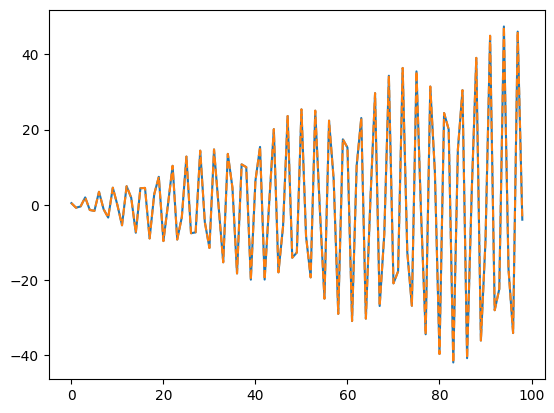

In [30]:
sin_cos_move_model = LinearRegression(fit_intercept=False)
sin_cos_move_model.fit(train_sin_cos_data,sin_cos_data_move)
plt.plot(sin_cos_move_model.predict(train_sin_cos_data))
plt.plot(sin_cos_data_move,linestyle = "--")

In [31]:
intercept = sin_cos_move_model.intercept_
coefficients = sin_cos_move_model.coef_

equation = f'y = '
for i, coef in enumerate(coefficients[0]):
    equation += f' ({coef} * {train_sin_cos_data.columns[i]}) +'

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
y =  (-2.904957035443144e-16 * const) + (1.474514954580286e-17 * trend) + (3.3235878784364237e-16 * sin(1,6.28)) + (8.111526316086082e-17 * cos(1,6.28)) + (-0.20807341827357115 * sin(2,6.28)) + (0.4546487134128408 * cos(2,6.28)) +


## One last function
### **x * sin(x) * cos(x) + log(x+1)**

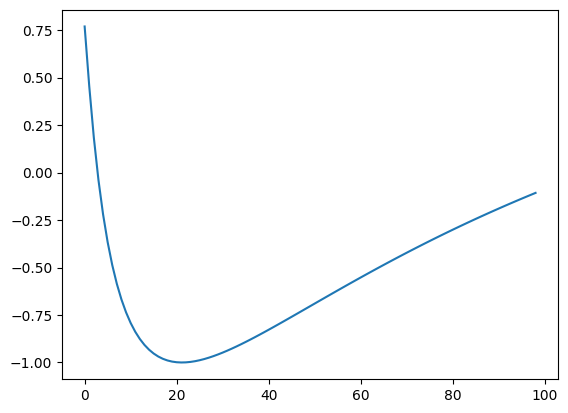

In [32]:
plt.plot(np.cos(np.log(train_data + 1)))

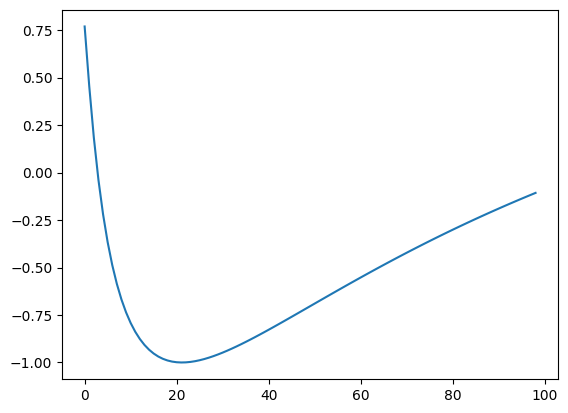

In [33]:
plt.plot((np.cos(np.log(train_data + 1))))

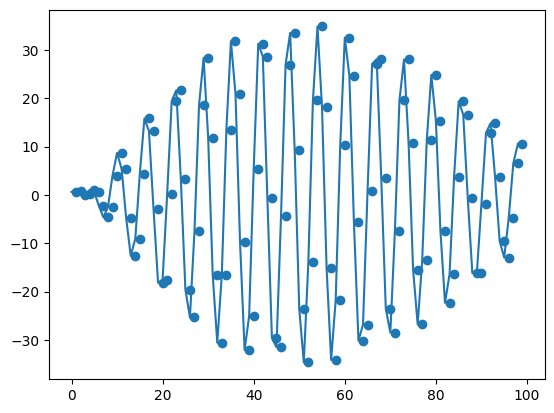

In [34]:
last_non_linear_data = ( train_data * np.sin(train_data) * (np.cos(np.log(train_data + 1))) )
# plt.plot(np.sin(train_data),linestyle = "--")
# plt.plot(np.cos(train_data),linestyle = "--")

plt.plot(last_non_linear_data)
plt.scatter(train_data ,last_non_linear_data)

In [35]:
det_proc = DeterministicProcess( np.arange(1,100), constant=True, period=(np.pi * 2) , fourier=1,order = 1)

train_sin_cos_log_data = det_proc.in_sample()
# train_sin_cos_data.drop(["sin(1,6.28)" ,"cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"] ,axis = 1,inplace =True)
# train_sin_cos_log_data[["sin(1,6.28)" ,"cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"]] = train_sin_cos_log_data[["sin(1,6.28)" ,"cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"]]
train_sin_cos_log_data
# train_sin_cos_log_data["curved_move"] =  (-train_data ** 2   +100* train_data)
train_sin_cos_log_data

,const,trend,"sin(1,6.28)","cos(1,6.28)"
1,1.0,1.0,0.000000,1.000000
2,1.0,2.0,0.841471,0.540302
3,1.0,3.0,0.909297,-0.416147
4,1.0,4.0,0.141120,-0.989992
5,1.0,5.0,-0.756802,-0.653644
...,...,...,...,...
95,1.0,95.0,-0.245252,0.969459
96,1.0,96.0,0.683262,0.730174
97,1.0,97.0,0.983588,-0.180430
98,1.0,98.0,0.379608,-0.925148


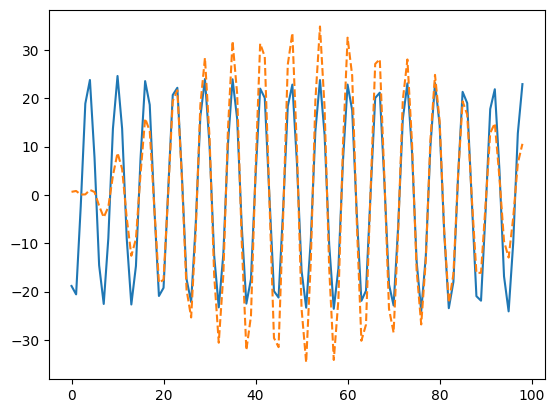

In [36]:
last_model = LinearRegression(fit_intercept=False)
last_model.fit(train_sin_cos_log_data,last_non_linear_data)
plt.plot(last_model.predict(train_sin_cos_log_data))
plt.plot(last_non_linear_data,linestyle = "--")

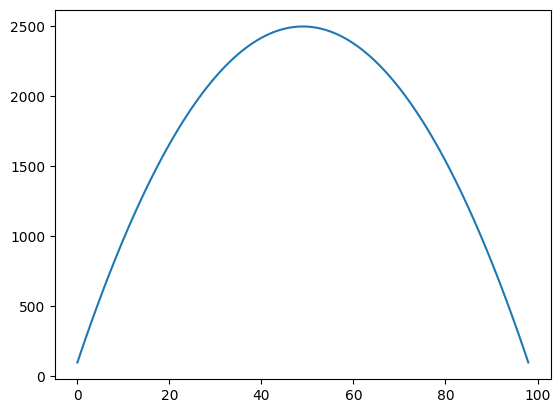

In [37]:
plt.plot( train_data ** 2 * -1 +  100* train_data)

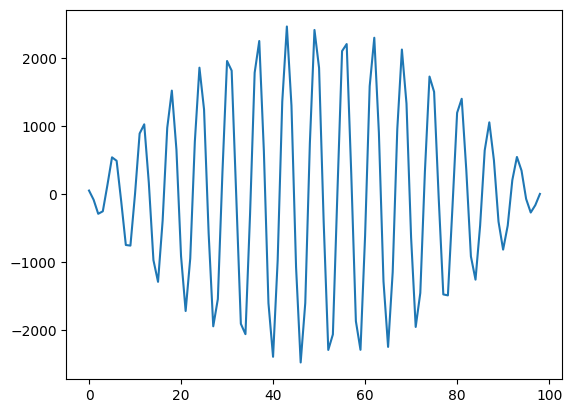

In [38]:
plt.plot(np.cos(train_data) *  (-train_data ** 2 + (100 * train_data) ))

In [39]:
# train_sin_cos_log_data[["sin(1,6.28)" ,"cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"]] =  train_sin_cos_log_data[["sin(1,6.28)" ,"cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"]] *  (-train_data ** 2   +100* train_data)
train_sin_cos_log_data[["sin(1,6.28)" ,"cos(1,6.28)"]] =  train_sin_cos_log_data[["sin(1,6.28)" ,"cos(1,6.28)"]] *  (-train_data ** 2   +100* train_data)

train_sin_cos_log_data

,const,trend,"sin(1,6.28)","cos(1,6.28)"
1,1.0,1.0,0.000000,99.000000
2,1.0,2.0,164.928313,105.899252
3,1.0,3.0,264.605551,-121.098729
4,1.0,4.0,54.190083,-380.157119
5,1.0,5.0,-359.481185,-310.480720
...,...,...,...,...
95,1.0,95.0,-116.494693,460.493199
96,1.0,96.0,262.372498,280.386647
97,1.0,97.0,286.224034,-52.505261
98,1.0,98.0,74.403117,-181.328917


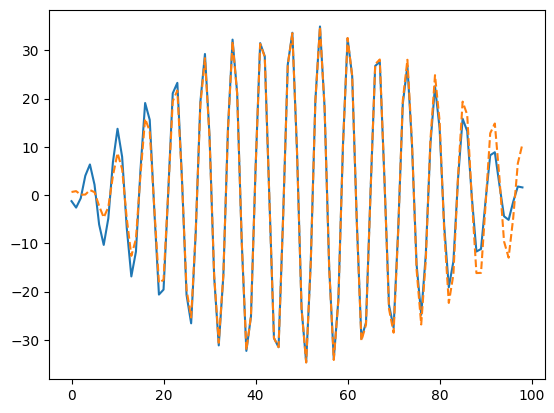

In [40]:
last_model = LinearRegression(fit_intercept=False)
last_model.fit(train_sin_cos_log_data,last_non_linear_data)
plt.plot(last_model.predict(train_sin_cos_log_data))
plt.plot(last_non_linear_data,linestyle = "--")

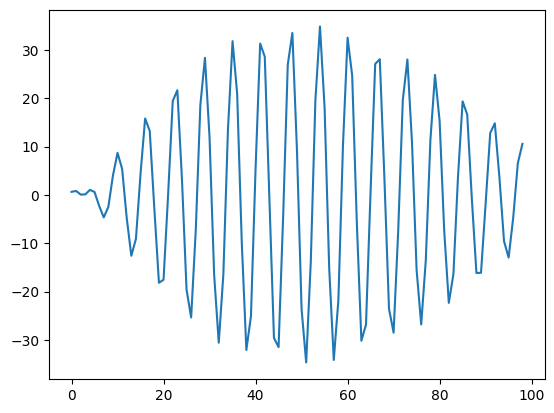

In [41]:
plt.plot(last_non_linear_data)

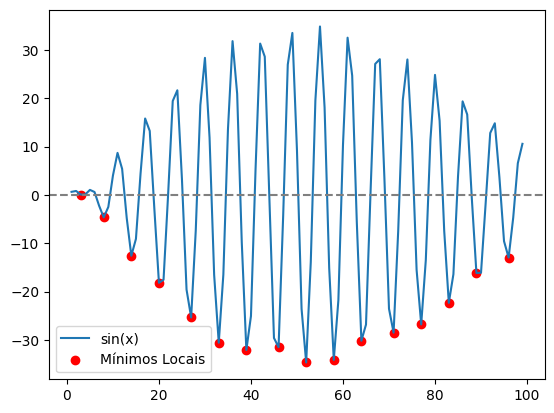

In [42]:
from scipy.signal import find_peaks

y = last_non_linear_data.reshape(1,-1)[0]
minima_indices, _ = find_peaks(-y)

minima_x = x[minima_indices]
minima_y = y[minima_indices]

plt.plot(x, y, label='sin(x)')
plt.scatter(minima_x, minima_y, color='red', label='Mínimos Locais')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.show()

In [43]:
minima_x

array([ 3,  8, 14, 20, 27, 33, 39, 46, 52, 58, 64, 71, 77, 83, 89, 96])

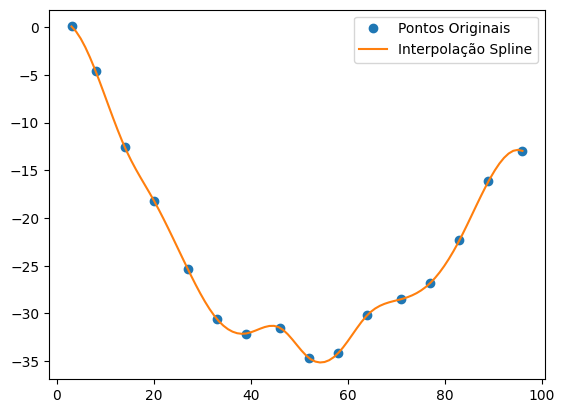

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

x_original = minima_x.reshape(1,-1)[0]
y_original = minima_y.reshape(1,-1)[0]

cs = CubicSpline(x_original, y_original)

x_new = np.linspace(x_original.min(), x_original.max(), 99)  # 100 novos pontos
y_new = cs(x_new)
func = y_new.reshape(-1,1)

plt.plot(x_original, y_original, 'o', label='Pontos Originais')
plt.plot(x_new, y_new, '-', label='Interpolação Spline')
plt.legend()
plt.show()



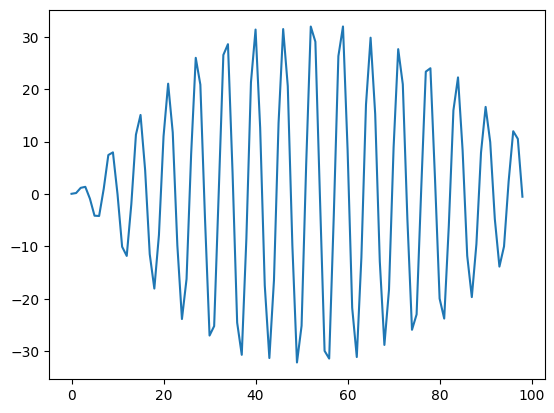

In [45]:
plt.plot(np.cos(train_data) * func)

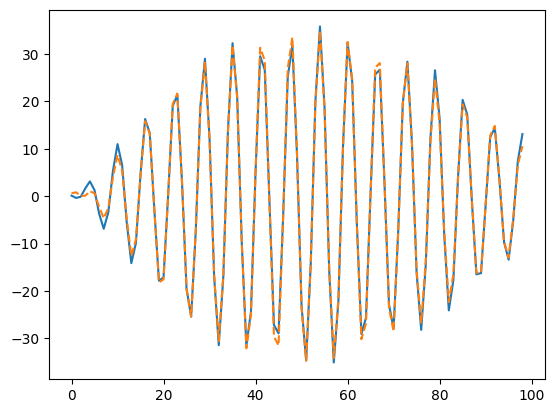

In [46]:
# train_sin_cos_log_data[["sin(1,6.28)" ,"cos(1,6.28)"]] =  train_sin_cos_log_data[["sin(1,6.28)" ,"cos(1,6.28)"]] *  func
det_proc_f = DeterministicProcess( np.arange(1,100), constant=True, period=(np.pi * 2) , fourier=1,order = 1)
final_sen_cos_log_data = det_proc_f.in_sample()
final_sen_cos_log_data[["sin(1,6.28)" ,"cos(1,6.28)"]] =  final_sen_cos_log_data[["sin(1,6.28)" ,"cos(1,6.28)"]] * func


last_model2 = LinearRegression(fit_intercept=False)
last_model2.fit(final_sen_cos_log_data,last_non_linear_data)
plt.plot(last_model2.predict(final_sen_cos_log_data))
plt.plot(last_non_linear_data,linestyle = "--")